# YOUR PROJECT TITLE

Imports and set magics:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import datetime as dt
# den skal installeres : pip install matplotlib - kan ikke få den til at virke

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

ModuleNotFoundError: No module named 'matplotlib_venn'

# Reading and cleaning the data

## Employment data

We're starting by reading the employment data in RAS200.xlsx and hereafter cleaning it by removing and renaming columns.

In [6]:
# a. loading the data
employment = pd.read_excel('RAS200.xlsx', skiprows=2)

# b. droping columns
drop = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
employment.drop(drop, axis=1, inplace=True)

# c. rename columns
employment.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

Showing the data

In [7]:
employment.head()

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


We're now removing all rows that not are municipalities

In [8]:
employment = dataproject.only_keep_municipalities(employment)
employment.head()

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2


From here we can now convert the data to a long format

In [10]:
# a. renaming columns for year
mydict = {str(i):f'employment{i}' for i in range(2008,2018)}
employment.rename(columns = mydict, inplace=True)

# b. convert to long
employment_long = pd.wide_to_long(employment, stubnames='employment', i='municipality', j='year').reset_index()

# c. show
employment_long.head()

,municipality,year,employment
0,Copenhagen,2008,72.5
1,Frederiksberg,2008,75.6
2,Dragør,2008,80.5
3,Tårnby,2008,79.0
4,Albertslund,2008,73.1


## Income data

Now we're reading the income data in INDKP101.xlsx and like before cleaning it by removing and renaming columns.

In [5]:
# a. loading data
income = pd.read_excel('INDKP101.xlsx', skiprows=2)

# b. droping colums
income.drop([f'Unnamed: {i}' for i in range(3)], axis=1, inplace=True)

# c. renaming columns
income.rename(columns = {'Unnamed: 3':'municipality'}, inplace=True)

# d. drop rows with missing
income.dropna(inplace=True)

# e. remove non-municipalities
income = dataproject.only_keep_municipalities(income)

As before we can now convert the data to a long format

In [11]:
# e. converting to long format
income.rename(columns = {str(i):f'income{i}' for i in range(1986,2018)}, inplace=True)
income_long = pd.wide_to_long(income, stubnames='income', i='municipality', j='year').reset_index()

# f. show
income_long.head(5)

,municipality,year,income
0,Copenhagen,1987,75356
1,Frederiksberg,1987,85428
2,Dragør,1987,97966
3,Tårnby,1987,87598
4,Albertslund,1987,83540


# Exploring the dataset



In order to be able to explore the raw data, we here provide an interactive plot to show, respectively, the employment and income level in each municipality

In [12]:
def plot_employment_income(employment,income,dataset,municipality): 
    
    if dataset == 'Employment':
        df = employment
        y = 'employment'
    else:
        df = income
        y = 'income'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

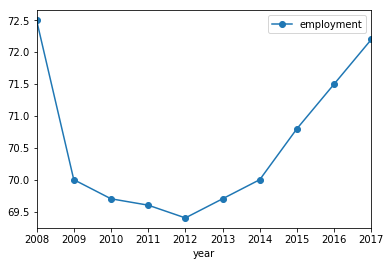

In [16]:
widgets.interact(plot_employment_income, 
    
    employment = widgets.fixed(employment_long),
    income = widgets.fixed(income_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Employment','Income']),
    municipality=widgets.Dropdown(description='Municipality',                                     options=employment_long.municipality.unique())
                 
);

# Merging datasets


In [35]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('income', 'employment'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

NameError: name 'venn' is not defined

In [36]:
merged = pd.merge(employment_long, income_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

NameError: name 'empl_long' is not defined

# Analysis of the merged data


In [37]:
merged.groupby('year').agg(['mean','std']).round(2)

NameError: name 'merged' is not defined

# Conclusion